# Polinomial Models

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [8]:
# Sample dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [50, 65, 75, 80, 85, 88, 89, 88, 85, 80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

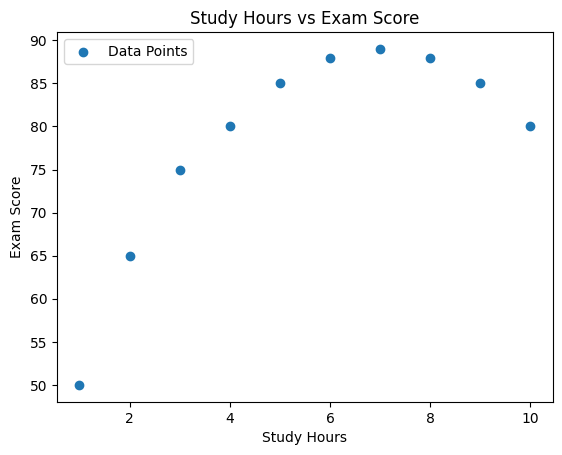

In [9]:
# Extract the features (Study_Hours) and target (Exam_Score)
x= df[['Study_Hours']]
y= df['Exam_Score']

plt.scatter(x,y, label ="Data Points")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Study Hours vs Exam Score")
plt.show()

In [10]:
# Fit linear regression for comparison
linearReg= LinearRegression()
linearReg.fit(x,y)
linearPred= linearReg.predict(x)

# Fit polynomial regression
features = PolynomialFeatures(degree=12)
x_poly= features.fit_transform(x)

polyReg= LinearRegression()
polyReg.fit(x_poly,y)
polyPred= polyReg.predict(x_poly)

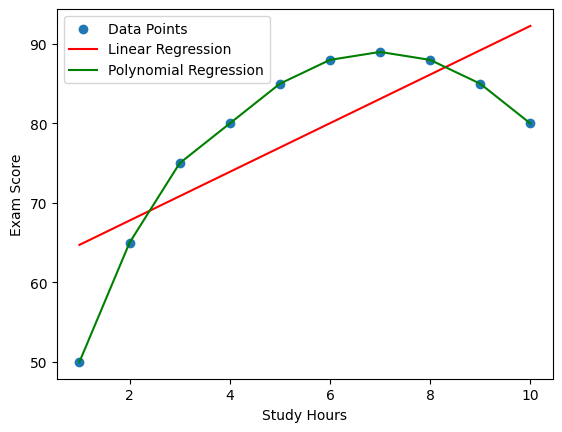

In [11]:
# Plot results
plt.scatter(x,y, label ="Data Points")
plt.plot(x, linearPred, color='red', label='Linear Regression')
plt.plot(x, polyPred, color='green', label='Polynomial Regression')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()

# Evaluate the models
linmse= mean_squared_error(y, linearPred)
linr2= r2_score(y, linearPred)
polymse= mean_squared_error(y, polyPred)
polyr2= r2_score(y, polyPred)

# Exponential regression

        Date  Engaged_Users
0 2022-01-01            100
1 2022-01-02            150
2 2022-01-03            225
3 2022-01-04            338
4 2022-01-05            507
5 2022-01-06            761
6 2022-01-07           1142
7 2022-01-08           1713
8 2022-01-09           2570
9 2022-01-10           3855

Modelo: y = 100.14 * e^(0.4056 * x)
Linear Regression MSE: 261371.25
Exponential Regression MSE: 0.05


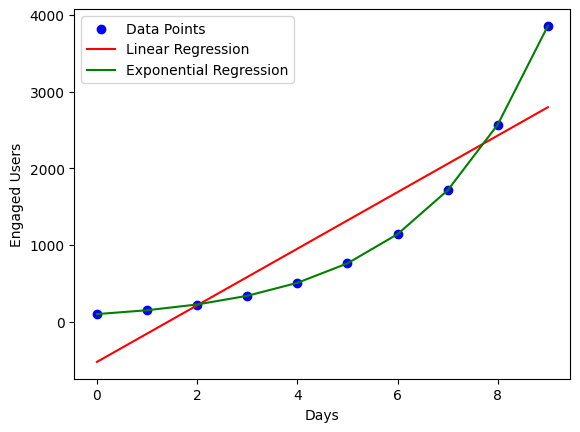

In [12]:

# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100,150,225,338,507,761,1142,1713,2570,3855]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the features (Date) and target (Engaged_Users)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days']]
y = df['Engaged_Users']

# Visualize the data
print(df[['Date', 'Engaged_Users']])


# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)


# Fit exponential regression
def exp_func(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exp_func, df['Days'], y, p0=(100, 0.1))
a, b = params
exp_pred = exp_func(df['Days'], a, b)

print(f"\nModelo: y = {a:.2f} * e^({b:.4f} * x)")


# Evaluate the models
mse_lin = mean_squared_error(y, lin_pred)
mse_exp = mean_squared_error(y, exp_pred)

print(f"Linear Regression MSE: {mse_lin:.2f}")
print(f"Exponential Regression MSE: {mse_exp:.2f}")

plt.scatter(df['Days'], y, color="blue", label="Data Points")
plt.plot(df['Days'], lin_pred, color="red", label="Linear Regression")
plt.plot(df['Days'], exp_pred, color="green", label="Exponential Regression")
plt.xlabel("Days")
plt.ylabel("Engaged Users")
plt.legend()
plt.show()


# Power models

Fitted parameters: a = 0.03, b = 2.38


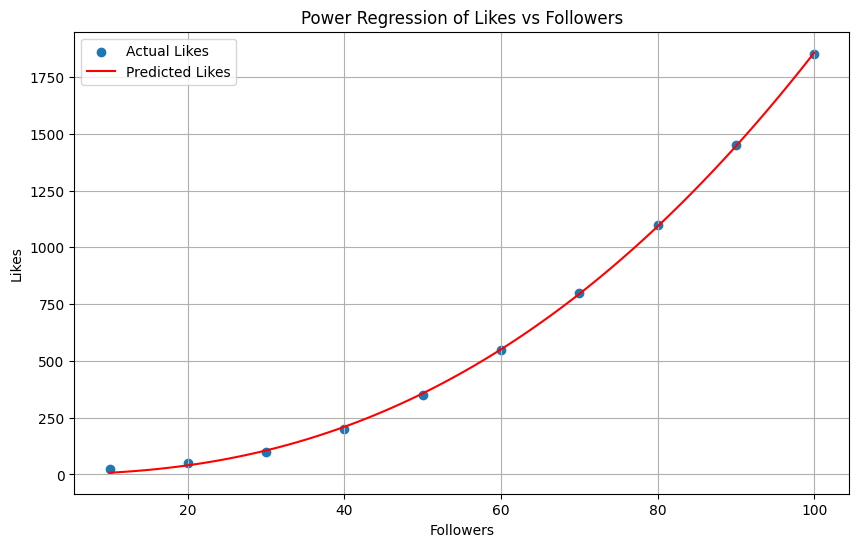

In [16]:
# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
    'Shares': [5,10,20,40,70,110,160,220,290,370],
    'Comments': [2,4,8,16,28,44,64,88,116,148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
# Define the power function
def power_func(x, a, b):
    return a * (x**b)
params, covariance = curve_fit(power_func, df['Followers'], df['Likes'], p0=[1, 1])
a_fit, b_fit = params
print(f"Fitted parameters: a = {a_fit:.2f}, b = {b_fit:.2f}")


# Generate a range of Followers values for the fitted curve
followers_range = np.linspace(df['Followers'].min(), df['Followers'].max(), 100)

# Calculate the predicted Likes using the fitted parameters
predicted_likes = power_func(followers_range, a_fit, b_fit)

# Create a plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Followers'], df['Likes'], label='Actual Likes')
plt.plot(followers_range, predicted_likes, color='red', label=f'Predicted Likes')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Power Regression of Likes vs Followers')
plt.legend()
plt.grid(True)
plt.show()